In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def display_img(img, cmap='gray'):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img, cmap)

In [3]:
road = cv2.imread('course material/DATA/road_image.jpg')
road_copy = road.copy()

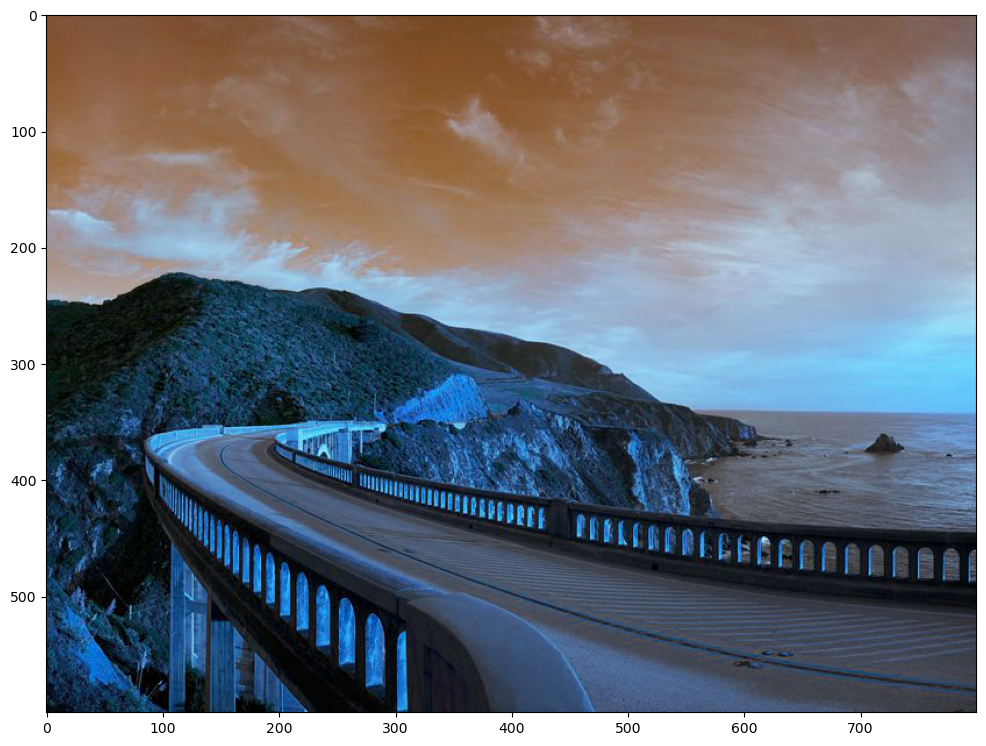

In [4]:
display_img(road)

In [5]:
road.shape

(600, 800, 3)

In [6]:
marker_image = np.zeros(road.shape[:2], dtype=np.int32)

In [7]:
segments = np.zeros(road.shape, dtype=np.uint8)

In [8]:
from matplotlib import cm

In [9]:
cm.tab10(0) #can use a lot of options here, with others patters of colors with more colors, it ups to you

(0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0)

In [10]:
tuple(np.array(cm.tab10(0)[:3])*255) #the correct is change from bgr 2 rgb, but we will only use to set seeds, so the color itself does not matter, just need be really diferent

(31.0, 119.0, 180.0)

In [11]:
def create_rgb(i):
    return tuple(np.array(cm.tab10(i)[:3])*255)

In [12]:
colors = []
for i in range(10):
    colors.append(create_rgb(i))

In [13]:
###
# global variables
#current_markers will be the color choice
n_markers = 10 #0-9
current_marker = 1
# markers updated by watershed
markers_updated = False
# callback function
def mouse_callback(event, x, y, flags, param):
    global markers_updated

    if event == cv2.EVENT_LBUTTONDOWN:
        #markers passed to the watershed algo
        cv2.circle(marker_image, (x,y), 10, (current_marker), -1)

        #user sees on the road image
        cv2.circle(road_copy, (x,y), 10, colors[current_marker], -1)
        markers_updated = True

In [14]:
# while true
cv2.namedWindow('Road Image')
cv2.setMouseCallback('Road Image', mouse_callback)
while True:
    cv2.imshow('Watershed Segments', segments)
    cv2.imshow('Road Image', road_copy)

    #close all windows
    k = cv2.waitKey(1)
    if k == 27:
        break

    #clearing all the colors press 'c' key
    elif k == ord('c'):
        road_copy = road.copy()
        marker_image = np.zeros(road.shape[:2], dtype=np.int32)
        segments = np.zeros(road.shape, dtype=np.uint8)
        
    #update color choice
    elif k > 0 and chr(k).isdigit():
        current_marker = int(chr(k))

    #update the markings
    if markers_updated:
        marker_image_copy = marker_image.copy()
        cv2.watershed(road, marker_image_copy)

        segments = np.zeros(road.shape, dtype=np.uint8)
        for color_ind in range(n_markers):
            # coloring segments, numpy call
            segments[marker_image_copy==(color_ind)] = colors[color_ind]
        markers_updated = False

cv2.destroyAllWindows()